## Hind Ali  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### 1-Load the Movie & Rating Data set to pandas and format the data in a way that will allow you to compare the average ratings from users for each genre. Hint:  Split the Movie data based on genre.

In [2]:
dfmovie=pd.read_csv('movies.csv')
dfrating=pd.read_csv('ratings.csv')


In [3]:
dfmovie.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
dfrating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
dfMerge = pd.merge(dfmovie,dfrating, on ='movieId')

In [6]:
split_genres = dfMerge['genres'].str.split('|', expand=True)
split_genres.columns = ['genre_{}'.format(i+1) for i in range(split_genres.shape[1])]
df = pd.concat([dfMerge, split_genres], axis=1)

In [7]:
df.head()

,movieId,title,genres,userId,rating,timestamp,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9,genre_10
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None


In [8]:
genre_mean=df.groupby(['userId','genres'])['rating'].mean()

In [9]:
genre_mean

userId  genres                          
1       Action|Adventure|Drama              2.0
        Action|Adventure|Fantasy            2.0
        Action|Adventure|Sci-Fi             4.0
        Action|Adventure|Sci-Fi|Thriller    2.0
        Action|Crime|Thriller               4.0
                                           ... 
671     Drama|War                           4.0
        Drama|Western                       4.0
        Musical|Romance                     5.0
        Thriller                            4.0
        Western                             4.0
Name: rating, Length: 45745, dtype: float64

In [10]:
dfmean = pd.DataFrame(genre_mean).reset_index()

In [11]:
dfmean 

,userId,genres,rating
0,1,Action|Adventure|Drama,2.0
1,1,Action|Adventure|Fantasy,2.0
2,1,Action|Adventure|Sci-Fi,4.0
3,1,Action|Adventure|Sci-Fi|Thriller,2.0
4,1,Action|Crime|Thriller,4.0
...,...,...,...
45740,671,Drama|War,4.0
45741,671,Drama|Western,4.0
45742,671,Musical|Romance,5.0
45743,671,Thriller,4.0


#### 2-Using pandas, find two genres with significant review data to analyze, (not sci-fi or romance as they were in the demo). Use graphs or any other numerical summaries to figure out two genres with higher ratings

In [12]:
genres = dfmean.sort_values(by='rating', ascending=False)

In [13]:
genres

,userId,genres,rating
13056,197,Action|Adventure|Animation|Horror|Sci-Fi,5.0
8005,116,Action|Adventure|Drama|Fantasy,5.0
8033,117,Drama|Musical|Romance,5.0
20592,304,Mystery|Sci-Fi|Thriller,5.0
40017,584,Action|Crime|Drama,5.0
...,...,...,...
30205,457,Children|Musical|Mystery,0.5
1061,17,Action|Adventure|Comedy|Crime|Thriller,0.5
30282,457,Drama|Sci-Fi|War,0.5
21072,311,Adventure|Drama|Fantasy,0.5


In [14]:
genres1 = ['Action', 'Drama']

In [15]:
dfg= genres.loc[genres['genres'].isin(genres1)]

In [16]:
dfg

,userId,genres,rating
30977,465,Drama,5.0
30953,464,Drama,5.0
30002,454,Drama,5.0
30346,458,Drama,5.0
19270,288,Action,5.0
...,...,...,...
25187,381,Action,1.0
32276,477,Drama,0.5
30029,455,Drama,0.5
13824,207,Drama,0.5


In [17]:
dfgenre = dfg.pivot_table(index='userId', columns='genres', values='rating', fill_value=0)

In [18]:
dfgenre['Action'] = dfgenre['Action'].replace(0,np.nan)
dfgenre['Drama'] = dfgenre['Drama'].replace(0,np.nan)

In [19]:
dfgenre = dfgenre.groupby(['userId']).mean()

In [20]:
dfgenre.head()

genres,Action,Drama
userId,,
1,NaN,2.833333
2,NaN,3.600000
3,NaN,4.250000
4,NaN,4.800000
5,NaN,4.000000


In [21]:
dfgenre = dfgenre.dropna(how='any')

In [22]:
dfgenre.head()

genres,Action,Drama
userId,,
18,3.0,3.000000
19,3.0,3.702128
32,4.0,3.600000
49,1.0,3.000000
58,2.0,3.400000


Text(0, 0.5, 'Drama Ratings')

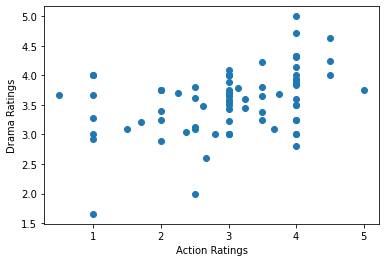

In [23]:
plt.scatter (dfgenre['Action'], dfgenre['Drama'])
plt.xlabel('Action Ratings')
plt.ylabel('Drama Ratings')

#### 3-Fit the data to a k-clustering model and experiment with 3 different K-Values to find segments where users have similar average ratings .  

In [24]:
from sklearn.cluster import KMeans

C:\Users\Hind Ali\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


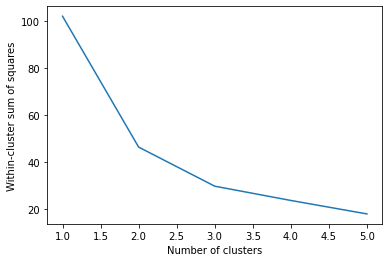

In [25]:
X = np.array(dfgenre)
sse = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 6), sse)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [26]:
# Add the cluster labels to the data frame
dfgenre['cluster'] = kmeans.labels_
# Group the data by cluster and calculate the average ratings
grouped = dfgenre.groupby('cluster').mean()[['Action','Drama']]
# Print the grouped data
print(grouped)

genres     Action     Drama
cluster                    
0        3.051948  3.717554
1        2.432456  3.187329
2        4.125000  4.202252
3        1.070000  3.249153
4        3.868056  3.274378


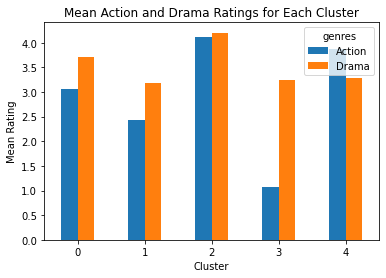

In [27]:
grouped.plot(kind='bar')
plt.title('Mean Action and Drama Ratings for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Rating')
plt.xticks(rotation=0)
plt.show()

#### 4-Do the same as in part 3 by selecting 4 genres with significant review(rating) data.  


In [28]:
genres2 = ['Action', 'Drama','Comedy','Adventure']

In [29]:
dfg1= genres.loc[genres['genres'].isin(genres2)]

In [30]:
dfgenre1 = dfg1.pivot_table(index='userId', columns='genres', values='rating', fill_value=0)

In [31]:
dfgenre1 ['Action'] = dfgenre1['Action'].replace(0,np.nan)
dfgenre1 ['Drama'] = dfgenre1['Drama'].replace(0,np.nan)
dfgenre1 ['Comedy'] = dfgenre1['Comedy'].replace(0,np.nan)
dfgenre1['Adventure'] = dfgenre1['Adventure'].replace(0,np.nan)

In [32]:
dfgenre1 = dfgenre1.groupby(['userId']).mean()

In [33]:
dfgenre1.head()

genres,Action,Adventure,Comedy,Drama
userId,,,,
1,NaN,NaN,NaN,2.833333
2,NaN,NaN,3.000000,3.600000
3,NaN,NaN,3.000000,4.250000
4,NaN,NaN,4.416667,4.800000
5,NaN,NaN,3.909091,4.000000


In [34]:
dfgenre1 = dfgenre1.dropna(how='any')

In [35]:
dfgenre1.head()

genres,Action,Adventure,Comedy,Drama
userId,,,,
199,4.00,2.000000,3.812500,3.916667
263,3.00,3.000000,3.500000,3.227273
287,4.50,4.500000,3.500000,4.625000
294,3.25,3.666667,3.468085,3.597222
311,2.50,3.000000,2.777778,3.121094


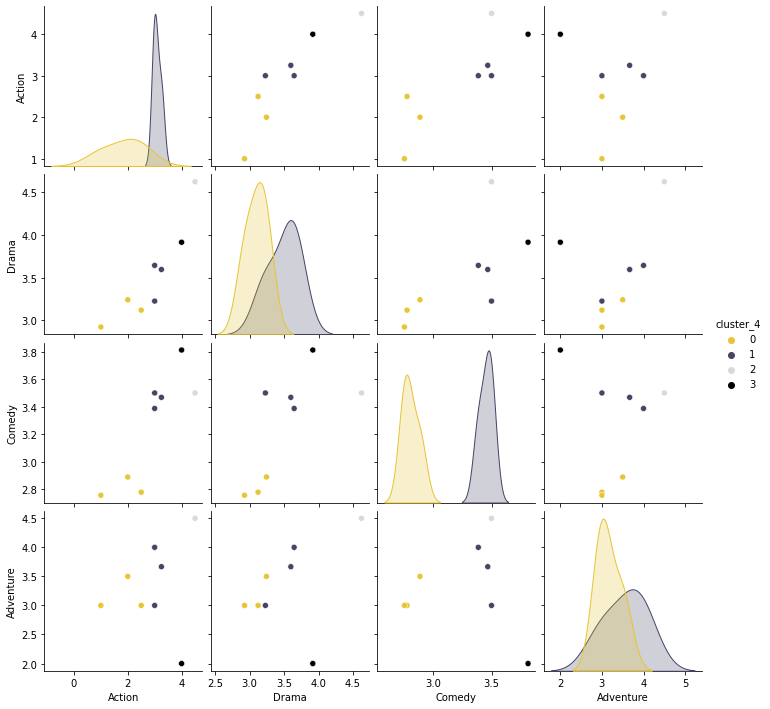

In [36]:
import seaborn as sns
for k in [2, 3, 4]:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(dfgenre1)
    dfgenre1[f'cluster_{k}'] = kmeans.labels_
colors = ['#E7C535', '#464566', '#D9D9D9', '#000000']
# Visualize the clusters using seaborn
sns.pairplot(dfgenre1, hue='cluster_4', vars=['Action', 'Drama', 'Comedy', 'Adventure'],palette=colors)

when the k=2, the pairplot shows that the genere in cluster 0 tend to have lower ratings (Action, Drama, Comedy, and Adventure) compared to the genre in cluster 1.
when k=3,The genre in cluster 2 tend to have higher ratings for all genres compared to the genre in cluster 0.
when k=4, the pairplot shows that the genre in cluster 0 tend to have lower ratings for Action and Drama genres but higher ratings for Comedy and Adventure genres compared to the genre in cluster 1. The genre in cluster 2 tend to have higher ratings for Action and Drama genres but lower ratings for Comedy and Adventure genres compared to the genre in cluster 3.

#### 5-Based on just the rating data, should a standard scaler be used to pre-process the data? 


StandardScaler is useful pre-processing technique when the features have different ranges or scale, In the above dataframe the rating of the data is likely to be relatively consistent, the rating scale between (2.0 to 4.5) so it may not be necessary to use a standard scaler for this dataset.

#### 6-Consider how the clustering exercise would be different with no genre data, could the data formatting we did with genres be done with movie titles? Justify your answer? 


Genre data provides a categorical variable that we can use  clustering  to group movies based on a shared attribute, the movie titles are text data that do not provide any inherent grouping or categorization so it may require different set of techniques.

#### 7-Can a k-clustering model predict how much someone will enjoy a movie with the given data?

No, a k-clustering model cannot predict how much someone will enjoy a movie with the given data.
K-means clustering is an unsupervised machine learning technique that aims to group data points into k clusters based on their similarities and does not predict any outcome or dependent variable.
so If we want to predict how much someone will enjoy a movie, we need a supervised learning technique that involves training a model on labeled data.